<a href="https://colab.research.google.com/github/ml2-project-team/Yahya_versions_ml2_project/blob/main/ML(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CreditCard Dataset

This project offers an applied route into data science, with a focus on applying unsupervised learning techniques to extract underlying patterns within financial transactions. Through pre-processing data, clustering, and outliers detection, we aim to transform raw data into meaningful insight. The project involves heavy experimentation, visualization, and model validation, emphasizing the intricacies of working with imbalanced, high-dimensional data.

In [106]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
import kagglehub
import os
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Load Data

In [107]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
csv_path = os.path.join(path, "creditcard.csv")
creditcard = pd.read_csv(csv_path)

In [108]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Overview

In [109]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [110]:
#Summary statistics
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [111]:
#check for missing values
print('Missing values:')
creditcard.isnull().sum()

Missing values:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


The dataset does not contain any missing values


# Features Distribution

In [112]:
X=creditcard.drop('Class',axis=1)
y=creditcard['Class']

In [113]:
'''sample = creditcard.sample(1000)
sns.pairplot(sample, hue='Class')'''

"sample = creditcard.sample(1000)\nsns.pairplot(sample, hue='Class')"

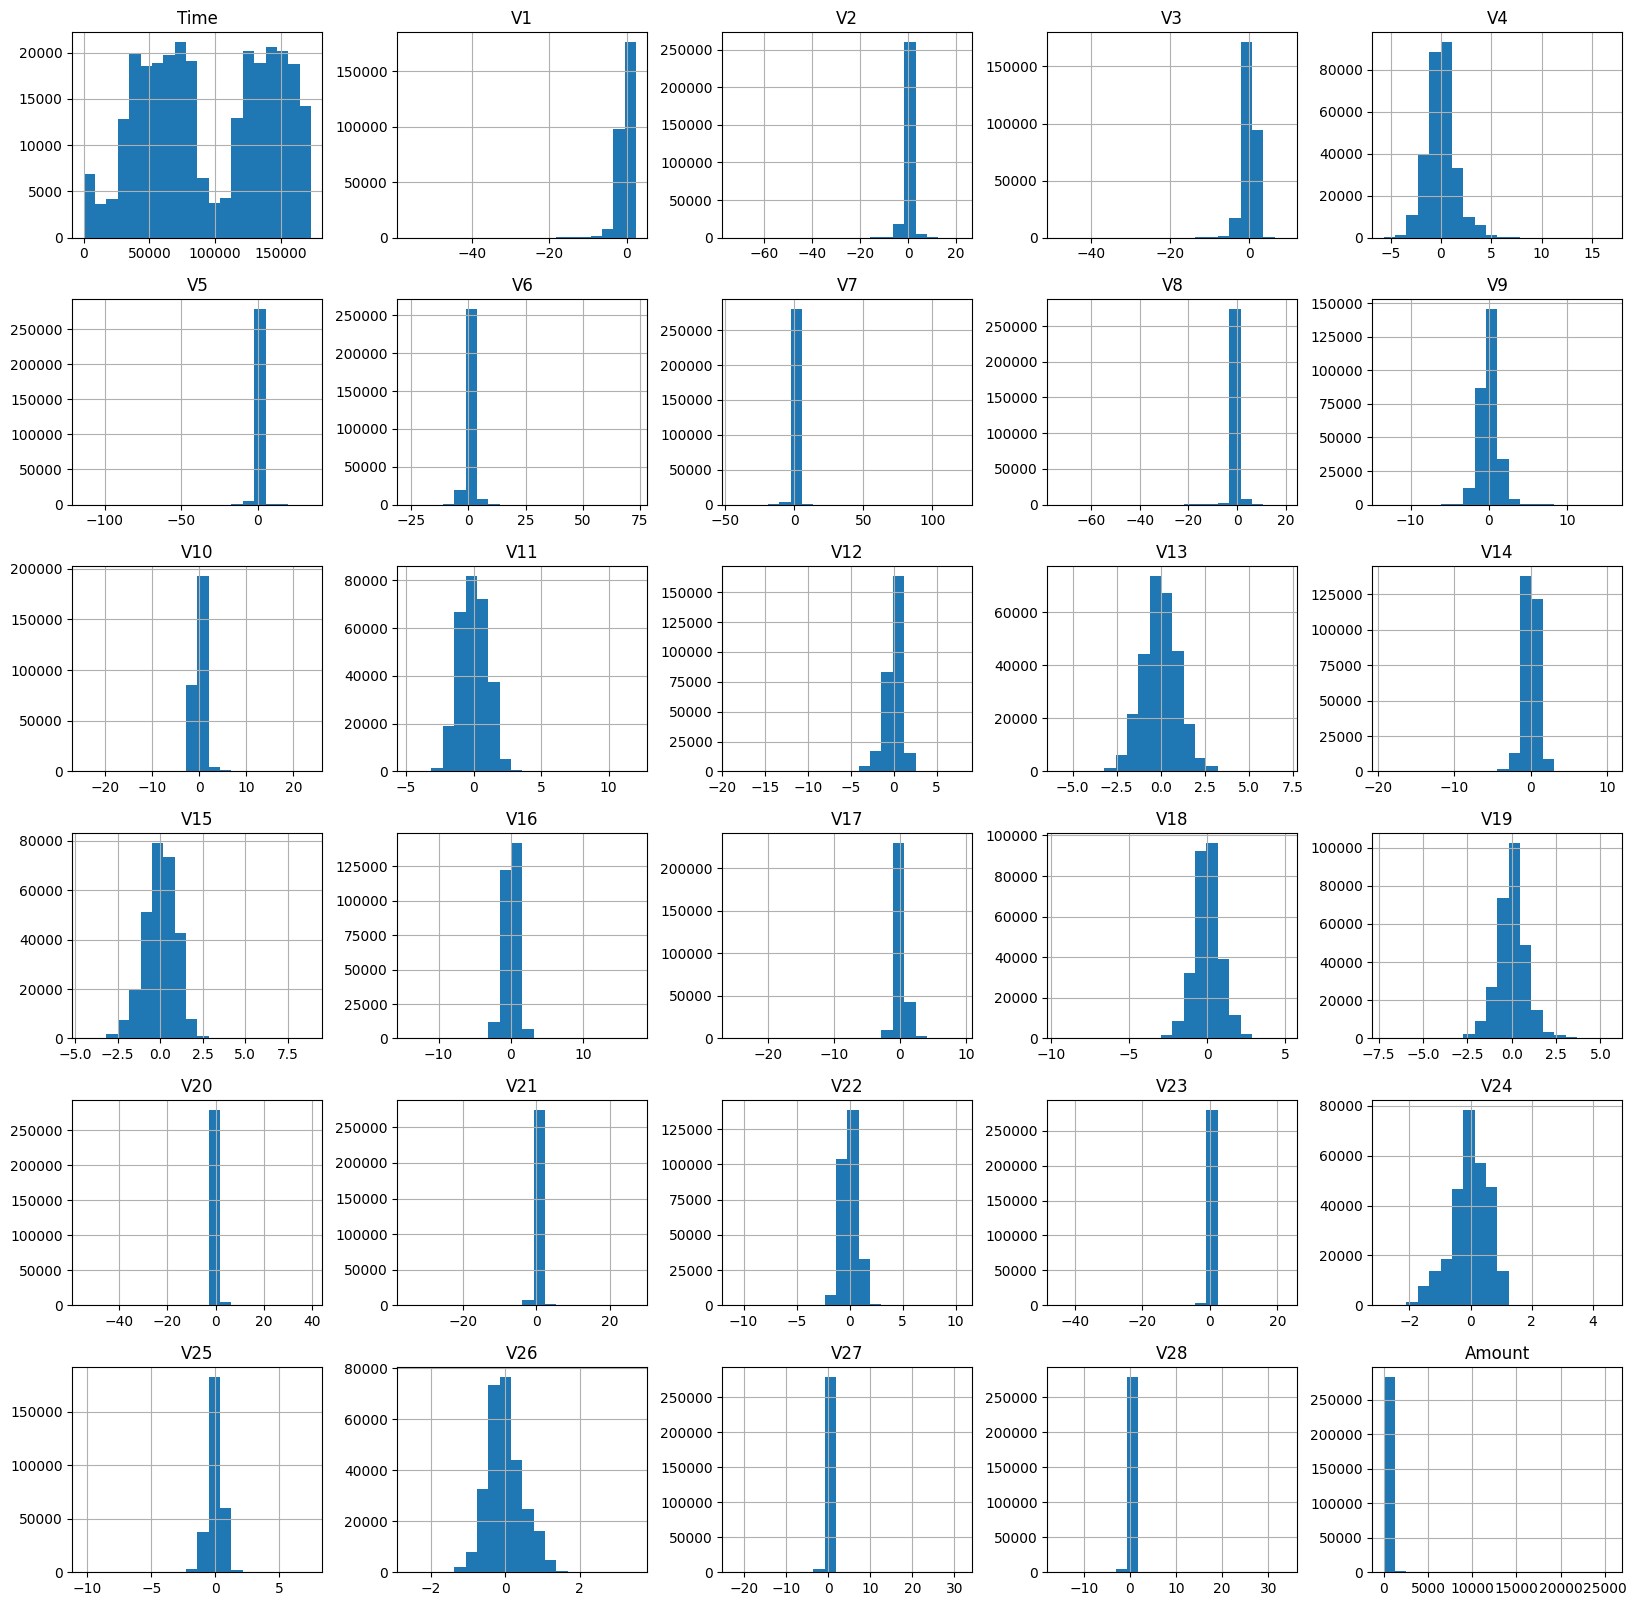

In [114]:
X.hist(figsize=(20,20),bins=20)
plt.show()

The histograms show the distribution of each feature in the dataset. Most features (V1–V28) are centered around zero and follow a roughly normal distribution, which is expected after PCA transformation. The Amount and Time features are skewed, indicating most transactions are low in value and occur in specific time periods

<Axes: xlabel='Time', ylabel='Count'>

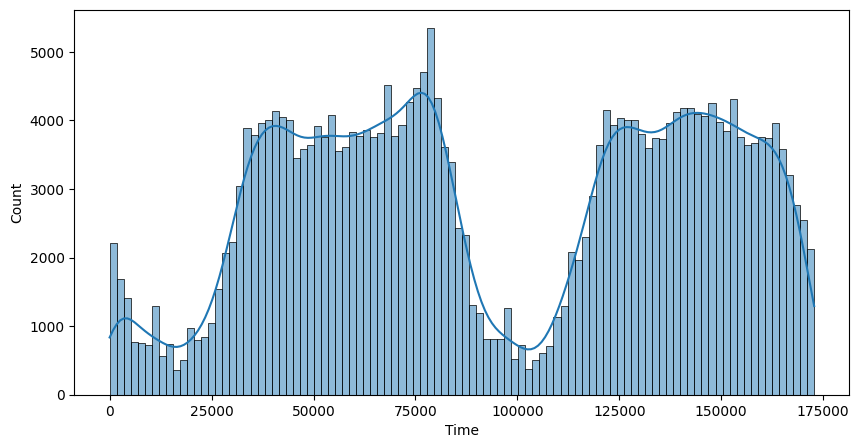

In [115]:
plt.figure(figsize=(10,5))
sns.histplot(X['Time'],kde=True,bins=100)

The distribution of Time **shows multiple peaks**, indicating that transactions occur in specific time intervals rather than uniformly throughout the day.

<Axes: xlabel='Amount', ylabel='Count'>

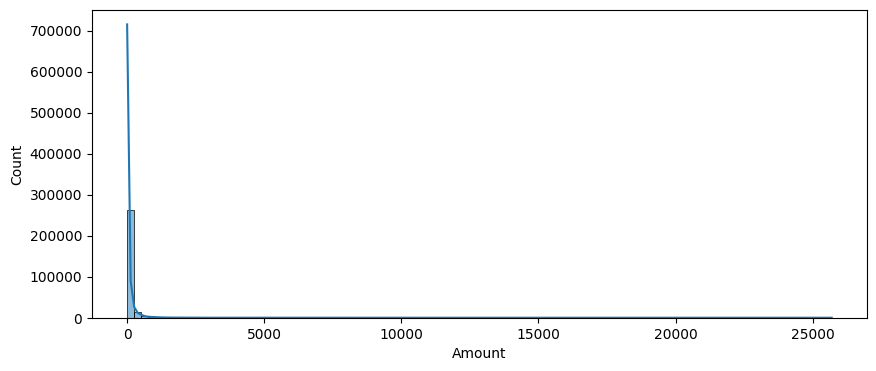

In [116]:
plt.figure(figsize=(10,4))
sns.histplot(X['Amount'],kde=True,bins=100)

The Amount distribution is **highly right-skewed**, meaning most transactions are of low value, with a few high-value outliers.

In [117]:
skewed_features = X.skew().sort_values(ascending=False)
skewed_features

,0
Amount,16.977724
V28,11.192091
V21,3.592991
V7,2.553907
V6,1.826581
V10,1.187141
V4,0.676292
V26,0.576693
V9,0.554680
V11,0.356506


In [118]:
Q75=X.quantile(0.75)
Q25=X.quantile(0.25)
IQR=Q75-Q25
min_point= Q25- IQR*1.5
max_point= Q75+ IQR*1.5
Outliers=((X<min_point)|(X>max_point))
print(Outliers.sum())

Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
dtype: int64


Based on the IQR method, several features contain a large number of outliers, especially V27, V28, Amount, and V20. This is expected in fraud detection datasets, as abnormal transactions often deviate significantly from typical patterns. These outliers should not be removed blindly, as they may represent fraudulent behavior and are potentially valuable for anomaly detection models.

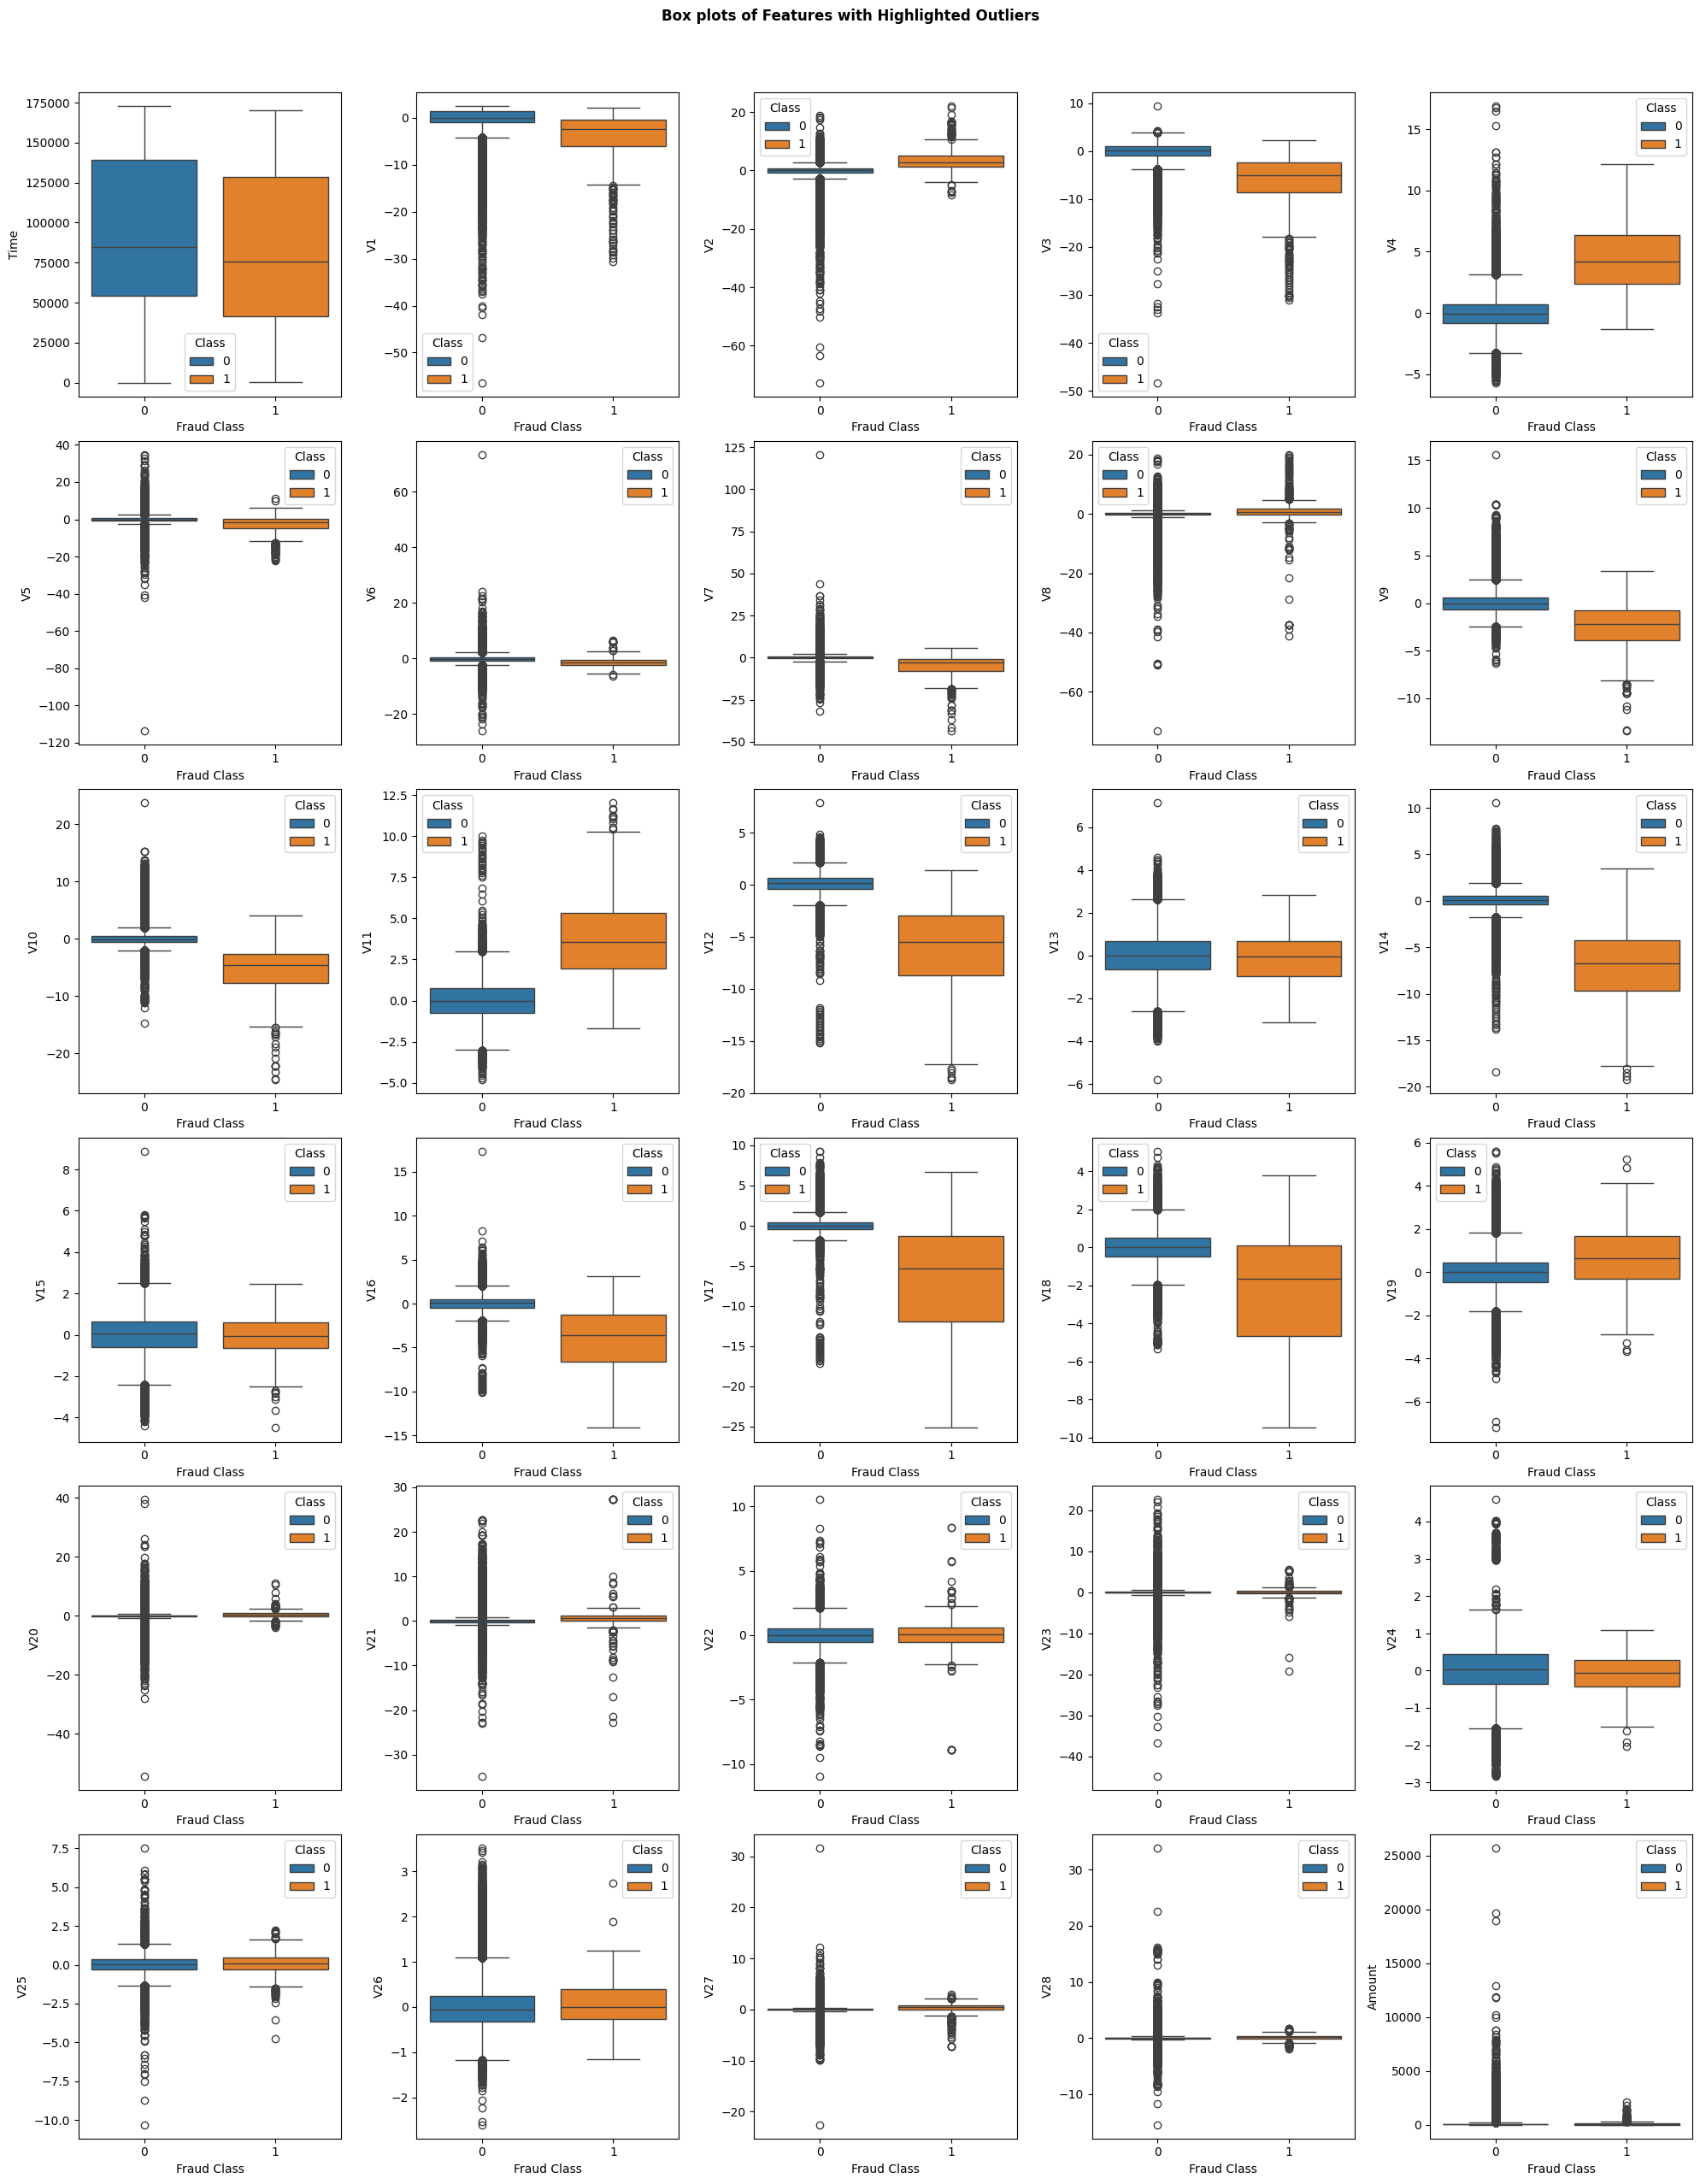

In [119]:
fig,ax=plt.subplots(6,5,figsize=(20,25))
ax=ax.flatten()

for r,c in enumerate(creditcard.columns[:-1]):
    sns.boxplot(data=creditcard,x='Class',ax=ax[r],hue='Class',y=c)
    ax[r].set_xlabel('Fraud Class')


fig.suptitle('Box plots of Features with Highlighted Outliers',weight='bold',y=1.02)
fig.tight_layout(h_pad=0.3)
plt.show()

Boxplots reveal that features like (V4, V10, V12, V14, and Amount) have significant distribution differences between fraudulent and non-fraudulent transactions. Additionally, a high presence of outliers—especially in fraudulent cases—suggests that anomalies in feature values can be strong indicators of fraud.

Text(0.5, 1.0, 'Correlation Matrix')

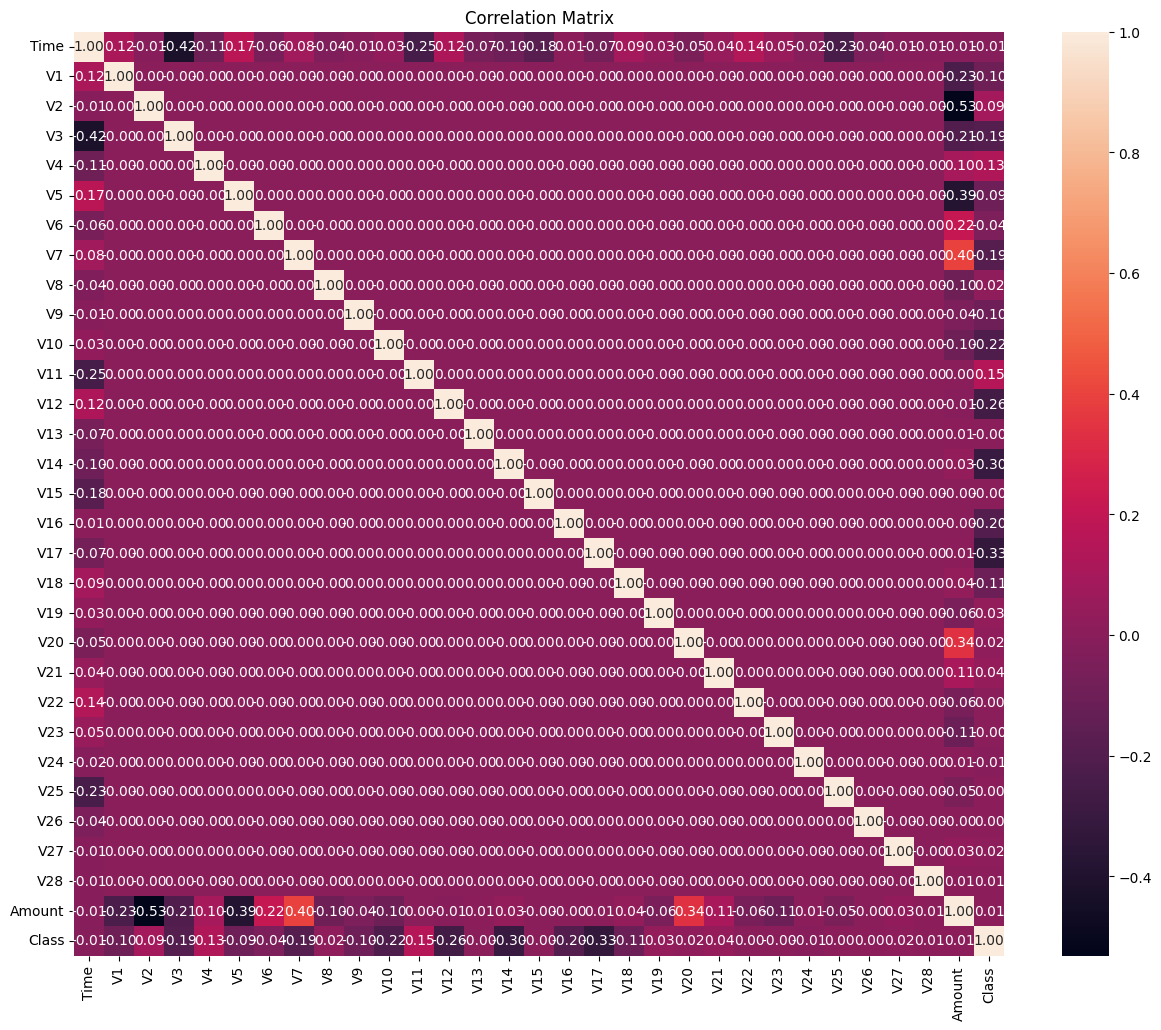

In [120]:
plt.figure(figsize=(15,12))
sns.heatmap(creditcard.corr(),annot=True,fmt=".2f")
plt.title('Correlation Matrix')

In [121]:
threshold = 0.9
FeaturesCorr=X.corr().abs()
for feature in FeaturesCorr.columns:

    high_corr = FeaturesCorr[feature][(FeaturesCorr[feature] > threshold) & (FeaturesCorr[feature] < 1)].index.tolist()

high_corr

[]

**NO**
features in the dataset have a correlation higher than 0.9 with each other, indicating low multicollinearity among the features.

# Class Distribution

Text(0.5, 1.0, 'Class Distribution')

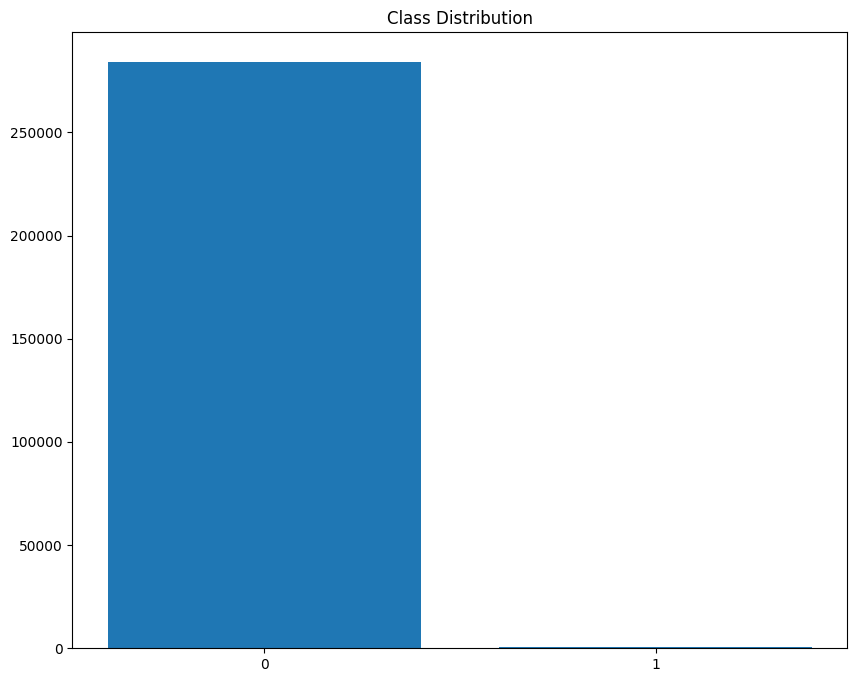

In [122]:
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(y.unique(),y.value_counts())
ax.set_xticks(y.unique())
ax.set_title('Class Distribution')

In [123]:
y.value_counts()

,count
Class,
0,284315
1,492


Text(0.5, 1.0, 'Class Distribution')

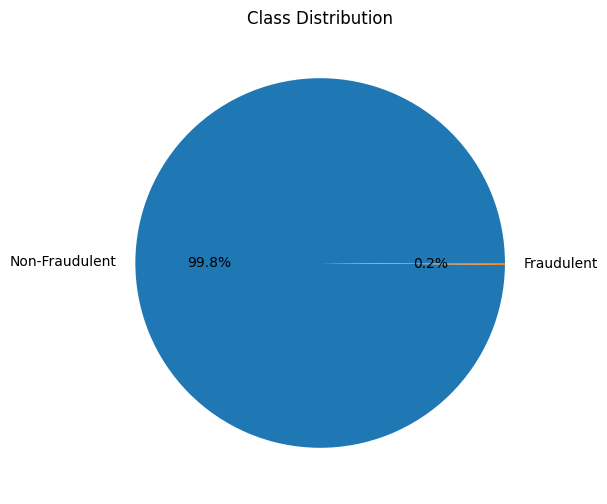

In [124]:
plt.figure(figsize=(8,6))
plt.pie(y.value_counts(),labels=['Non-Fraudulent','Fraudulent'],autopct='%1.1f%%')
plt.title('Class Distribution')

The dataset **is highly imbalanced** , with approximately  **99.8%** of the transactions labeled as *non-fraudulent* and only**0.2%**as *fraudulent*. This class imbalance must be addressed before training a model to avoid biased predictions.

In [125]:
percentage = (y.value_counts() / len(y))*100
print(max(percentage)-min(percentage))

99.65450287387598


The difference between the class percentages is 99.6, highlighting a severe class imbalance in the dataset

Number of components to retain 90% variance: 27


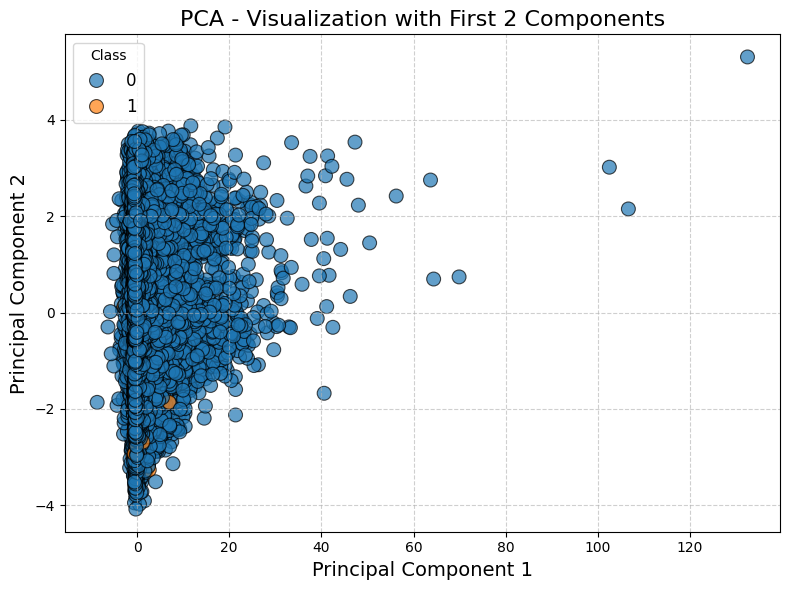

In [126]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


pca = PCA(n_components=0.93)
X_pca_full = pca.fit_transform(X_scaled)
print("Number of components to retain 90% variance:" ,pca.n_components_)
pca_df = pd.DataFrame(data=X_pca_full, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['Label'] = y.values


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='tab10', s=100, alpha=0.7, edgecolor='k', marker='o')
plt.title('PCA - Visualization with First 2 Components', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Class', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



PCA plot showing the data in 2D using the top two principal components. Points are colored by true class labels: blue for Class 0 and orange for Class 1. The goal here is only visualization as part of EDA, not actual dimensionality reduction for modeling

The PCA visualization reveals a highly imbalanced dataset, with Class 0 overwhelmingly more frequent than Class 1. Additionally, there is no clear linear separation between the two classes in the reduced 2D space, suggesting that more complex or non-linear models may be needed for effective classification

# Preprocessing

# Feature Engineering

In [127]:
X['Hours']=(X['Time']//3600)%24

In [128]:
'''fraud_per_hour= X[y==1].groupby(X['Hours']).size()# Count fraud cases per hour
fraud_counts=fraud_per_hour.to_dict()
X['FraudCounts']=X['Hours'].map(fraud_counts).fillna(0)

for hour, count in sorted(fraud_per_hour.items()):
    print(f"Hour {hour}: {count} Fraudulent Transactions")

plt.figure(figsize=(10,6))
sns.barplot(x=X['Hours'].unique(),y=fraud_per_hour.values)
plt.title('Fraudulent Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()'''

'fraud_per_hour= X[y==1].groupby(X[\'Hours\']).size()# Count fraud cases per hour\nfraud_counts=fraud_per_hour.to_dict()\nX[\'FraudCounts\']=X[\'Hours\'].map(fraud_counts).fillna(0)\n\nfor hour, count in sorted(fraud_per_hour.items()):\n    print(f"Hour {hour}: {count} Fraudulent Transactions")\n\nplt.figure(figsize=(10,6))\nsns.barplot(x=X[\'Hours\'].unique(),y=fraud_per_hour.values)\nplt.title(\'Fraudulent Transactions per Hour\')\nplt.xlabel(\'Hour of the Day\')\nplt.ylabel(\'Number of Fraudulent Transactions\')\nplt.show()'

We initially considered adding a feature representing the number of fraud cases per hour (FraudCounts). However, since this feature would be derived using the target labels (y), it introduces the risk of data leakage. Using such a feature would allow the model to indirectly access information about the target during training, which can lead to overly optimistic results and poor generalization.
Therefore, we decided not to include this feature to maintain the integrity of the unsupervised learning process.

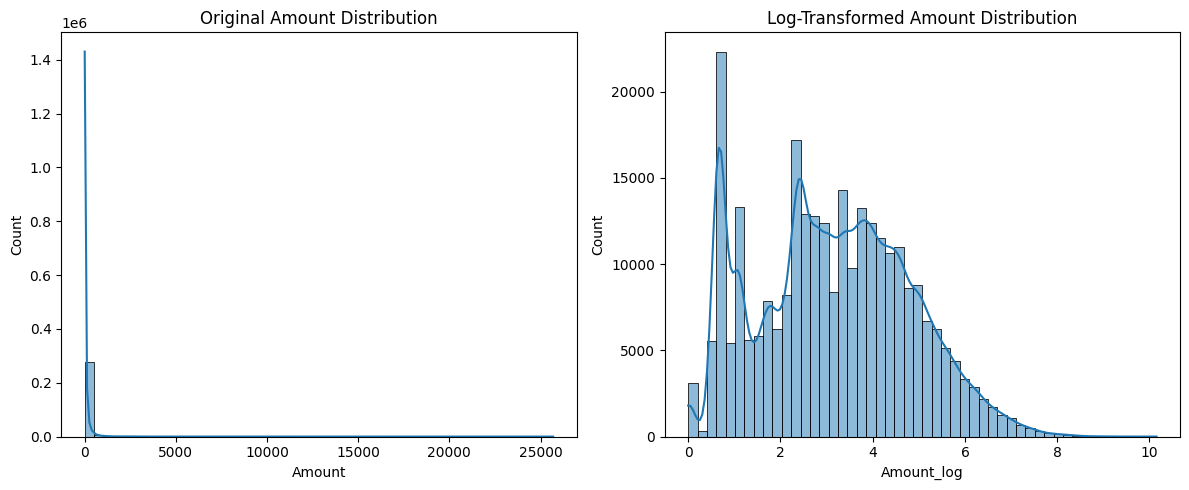

In [129]:
# Apply log transformation to the Amount column
X['Amount_log'] = np.log1p(X['Amount'])


# Plot original and transformed distributions
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(X['Amount'], bins=50, kde=True)
plt.title('Original Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(X['Amount_log'], bins=50, kde=True)
plt.title('Log-Transformed Amount Distribution')

plt.tight_layout()
plt.show()

We applied a log1p transformation to the Amount feature to reduce right skewness and make the distribution more normal-like, which can help with model performance. Since this new feature is mathematically derived from the original, **it may cause multicollinearity**. We will later check for multicollinearity before deciding whether to drop the original Amount feature.



In [130]:
X[['Amount','Amount_log']].corr()

,Amount,Amount_log
Amount,1.000000,0.552005
Amount_log,0.552005,1.000000


We created a log-transformed version of the Amount feature (Amount_log) to reduce skewness. After evaluating both features in a separate notebook — including clustering metrics and anomaly detection performance — we found that the results were nearly identical.
Additionally, a correlation check showed no strong multicollinearity between Amount and Amount_log.
Therefore, we decided to keep only one to avoid redundancy, while noting that using either will not negatively affect model performance.

# Fix skewness

In [131]:
skewed_features2=skewed_features[abs(skewed_features.values)>0.75]
print(skewed_features2)
skewed_features2=skewed_features2.index

Amount    16.977724
V28       11.192091
V21        3.592991
V7         2.553907
V6         1.826581
V10        1.187141
V16       -1.100966
V27       -1.170209
V14       -1.995176
V20       -2.037155
V3        -2.240155
V12       -2.278401
V5        -2.425901
V1        -3.280667
V17       -3.844914
V2        -4.624866
V23       -5.875140
V8        -8.521944
dtype: float64


In [132]:
yj=PowerTransformer(method='yeo-johnson')

X[skewed_features2] =yj.fit_transform(X[skewed_features2])

In [133]:
after_fixed=X.skew().sort_values(ascending=False)
after_fixed

,0
V27,3.465031
V7,2.594575
V8,2.297590
V28,1.069192
V4,0.676292
V26,0.576693
V9,0.554680
V11,0.356506
V2,0.334852
Amount_log,0.162703


In [134]:
new_skewed_features=after_fixed[abs(after_fixed.values)>0.75].index
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X[new_skewed_features] =qt.fit_transform(X[new_skewed_features])

In [135]:
X.skew().sort_values(ascending=False)

,0
V4,0.676292
V26,0.576693
V9,0.554680
V11,0.356506
V2,0.334852
Amount_log,0.162703
V12,0.158932
V16,0.137437
V19,0.109192
V14,0.105966


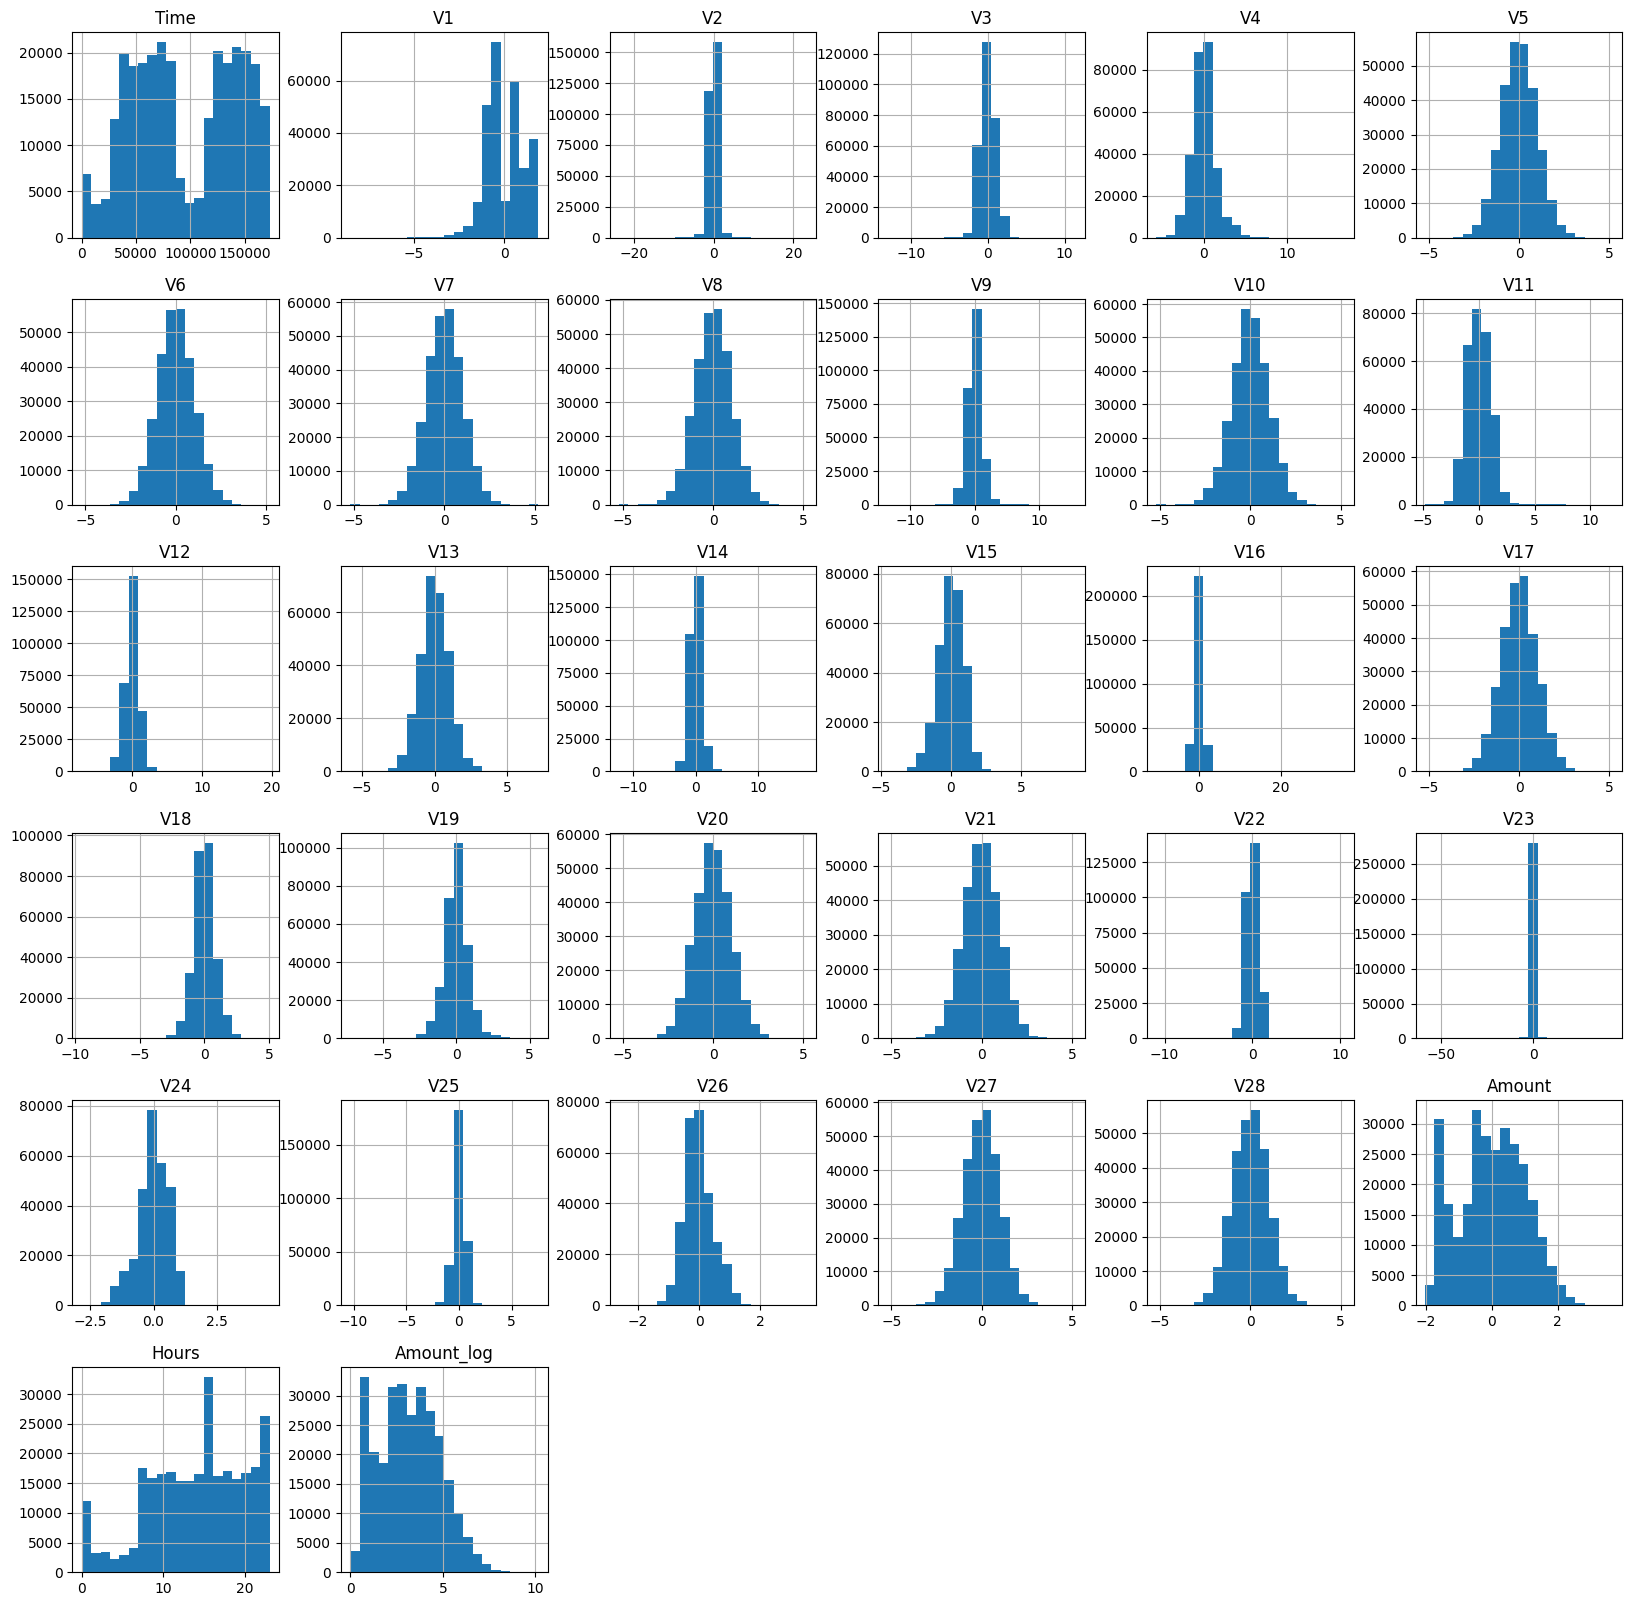

In [136]:
X.hist(figsize=(20,20),bins=20)
plt.show()

Initially, the dataset showed significant skewness in several features, especially Amount and some PCA components. To address this, **the Yeo-Johnson** transformation was applied, as it can handle both positive and negative values unlike log-transformations.

While this reduced skewness for many features, *some variables remained
non-Gaussian and showed heavy tails* . Therefore, a **Quantile Transformer** was
subsequently applied to map the data to a uniform distribution and then approximate a normal distribution.

This two-step transformation significantly improved feature distributions, making them more suitable for clustering and anomaly detection models.

# Scaling

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) #

Although the task is unsupervised, I split the data into training and testing sets to ensure fair evaluation of the algorithms and avoid data leakage. This allows me to fit transformations like scaling and PCA only on the training data and then apply them to the test set, simulating how the model would perform on unseen data. It is especially important when applying anomaly detection techniques like One-Class SVM and Isolation Forest, which assume the training data represents the normal behavior.

In [138]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA

In [139]:
pca=PCA().fit(X_train_scaled)

In [140]:
cumulativeVariance=np.cumsum(pca.explained_variance_ratio_)#This line calculates the cumulative sum of the variance explained by each principal component in PCA
cumulativeVariance

array([0.08311965, 0.15085883, 0.20873142, 0.26439015, 0.31029389,
       0.3527371 , 0.39392086, 0.43396684, 0.47289182, 0.50945577,
       0.54533985, 0.57898056, 0.61167805, 0.6435848 , 0.67509542,
       0.70637547, 0.73756264, 0.76848536, 0.79861813, 0.82815221,
       0.85655783, 0.88131685, 0.89941655, 0.91661573, 0.93306657,
       0.94835934, 0.96211797, 0.97443474, 0.9845117 , 0.99313357,
       0.99998923, 1.        ])

The goal is to calculate the total variance explained by the first n principal components, helping decide how many components are needed to capture a desired percentage of the total variance.

In [141]:
n_components=np.argmax(cumulativeVariance>=0.93)+1 #Determines the number of principal components needed to retain at least 90% of the cumulative variance in PCA
print('The number of principal component is:' ,n_components)

The number of principal component is: 25


In [142]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [143]:
fig = go.Figure()
#cumulative variance plot
fig.add_trace(go.Scatter(x=list(range(1, len(cumulativeVariance) + 1)),
                         y=cumulativeVariance,
                         mode='markers+lines',
                         name='Cumulative Variance',
                        ))

# Add the 95% threshold line
fig.add_trace(go.Scatter(x=[1, len(cumulativeVariance)],
                         y=[0.93, 0.93],
                         mode='lines',
                         name='93% Threshold',
                         line=dict(dash='dash')
                        ))


fig.update_layout(
    title="Cumulative Variance vs Number of Principal Components",
    xaxis_title="Number of Principal Components",
    yaxis_title="Cumulative Variance Percentage",
    template="plotly",
    showlegend=True
)

fig.show()


In [144]:
print(X_train_scaled.shape)

(227845, 32)


In [145]:
pca2=PCA(n_components=n_components)
X_train_pca=pca2.fit_transform(X_train_scaled)
X_test_pca=pca2.transform(X_test_scaled)

In [146]:
print(X_train_pca.shape)

(227845, 25)


After applying PCA, the number of principal components was reduced while retaining 93% of the cumulative variance, resulting in a more efficient representation of the data with fewer dimensions

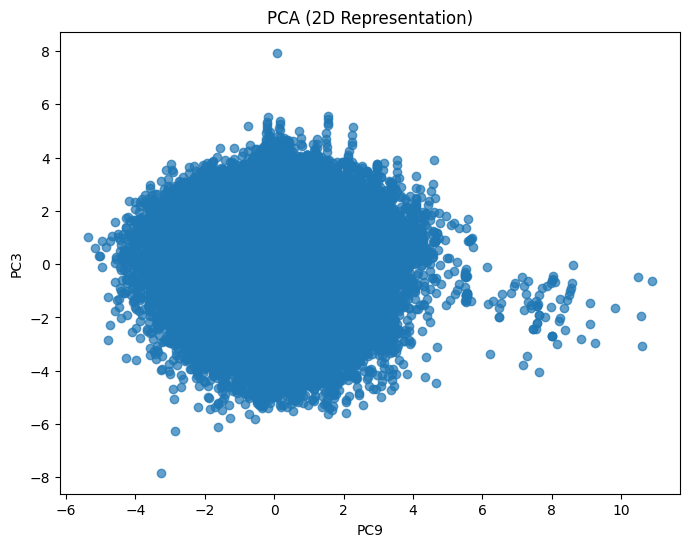

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,9], X_train_pca[:,3], alpha=0.7)# the components are chosen randomly
plt.title('PCA (2D Representation)')
plt.xlabel('PC9')
plt.ylabel('PC3')
plt.show()

# T-SNE

In [148]:
X_sample=pd.DataFrame(X_train_pca).sample(n=5000,random_state=42)
tsne=TSNE(n_components=2,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.348s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.684465
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.225754
[t-SNE] KL divergence after 500 iterations: 1.823776


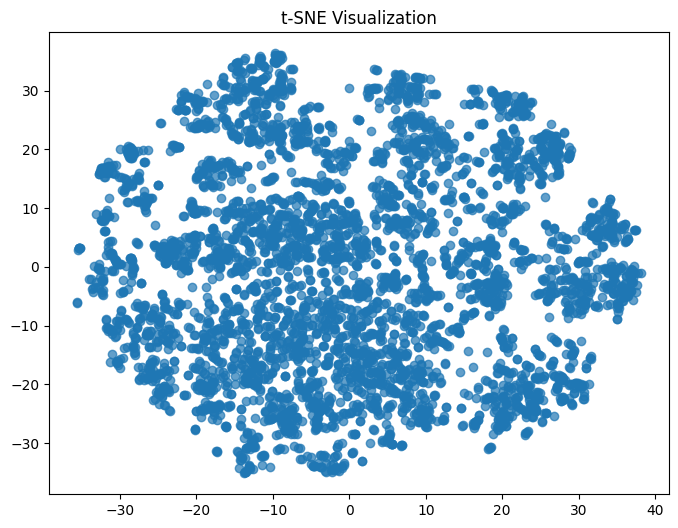

In [149]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.7)
plt.title('t-SNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
plt.show()

This t-SNE plot visualizes the high-dimensional data in two dimensions, where each point represents a data sample, and clusters indicate groups of similar samples in the original feature space

In [100]:
tsne=TSNE(n_components=3,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.684465
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.269295
[t-SNE] KL divergence after 500 iterations: 1.582443


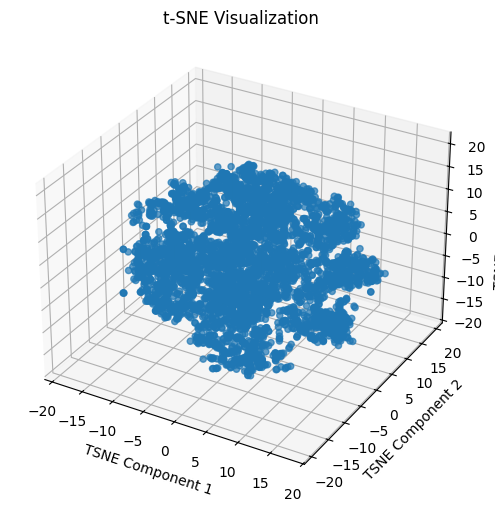

In [101]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], alpha=0.7)
ax.set_title('t-SNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')

plt.show()

This 3D t-SNE plot visualizes high-dimensional data reduced to three components, where each point represents a data sample, and the spatial distribution reflects similarities among samples in the original space

# Kmeans

In [102]:
kmeans1 = KMeans(n_clusters=2, random_state=42)
kmeans1.fit(X_train_pca)
train_clusters=kmeans1.predict(X_train_pca)
test_clusters=kmeans1.predict(X_test_pca)

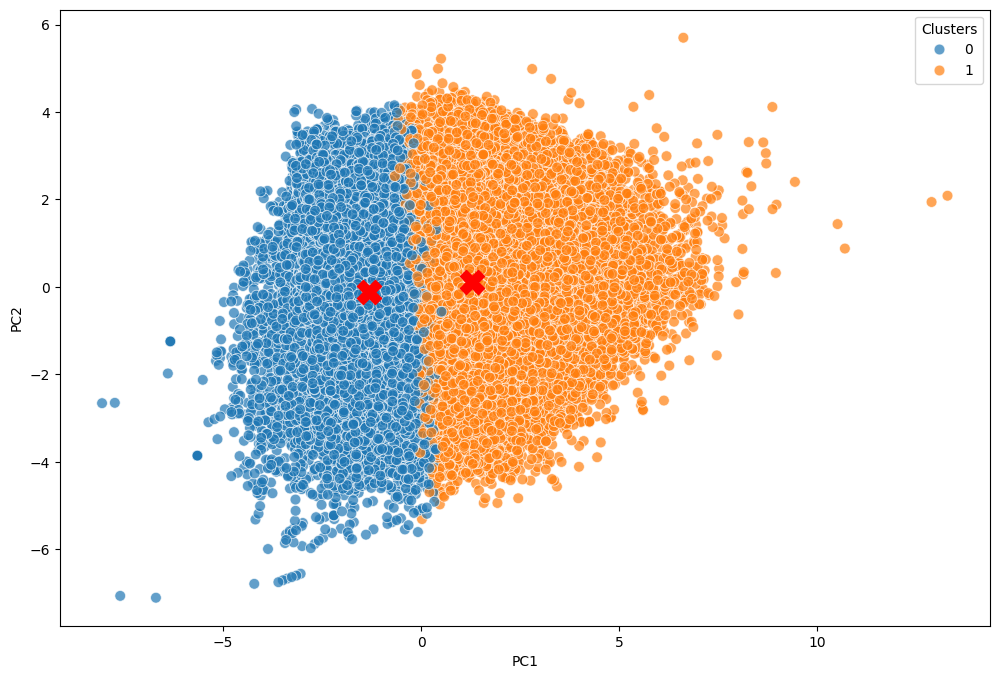

In [103]:
cluster_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
cluster_df['Clusters'] = kmeans1.labels_

plt.figure(figsize=(12, 8))

sns.scatterplot(data=cluster_df,  x='PC1', y='PC2',
                hue='Clusters',
                alpha=0.7,
                s=60)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='red',
            s=300,
            marker='X',
            label='Cluster Centers')

In [104]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(X_scaled)
train_clusters=kmeans2.predict(X_scaled)

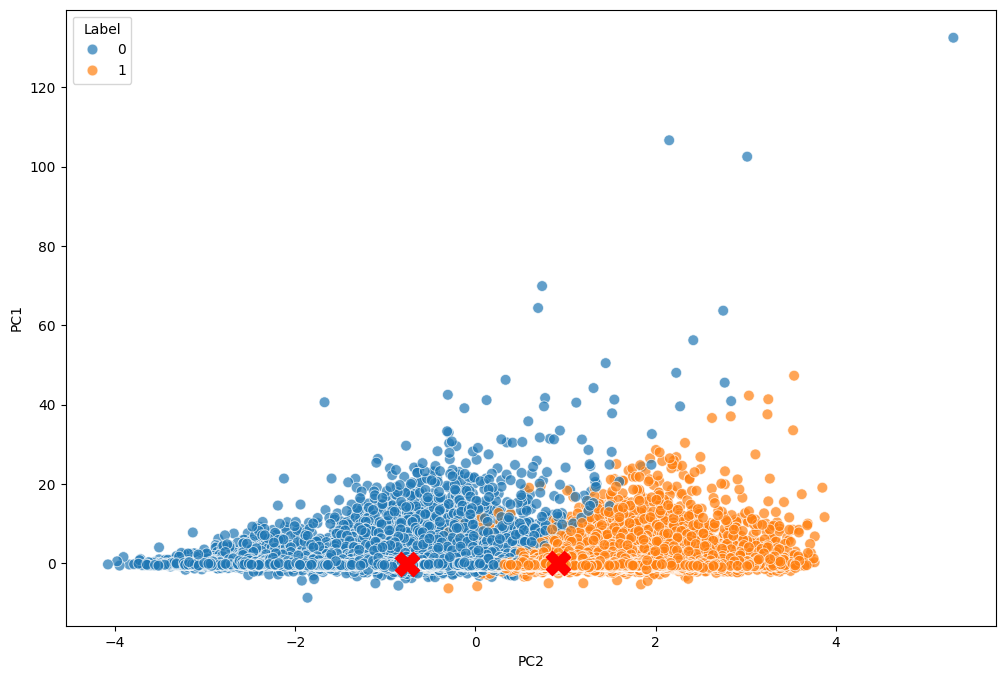

In [105]:
pca_df = pd.DataFrame(data=X_pca_full, columns=[f'PC{i+1}' for i in range(27)])
pca_df['Label'] = kmeans2.labels_

plt.figure(figsize=(12, 8))

sns.scatterplot(data=pca_df,  x='PC2', y='PC1',
                hue='Label',
                alpha=0.7,
                s=60)
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='red',
            s=300,
            marker='X',
            label='Cluster Centers')